# Linear Regression 

## import library

In [57]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D

## load point data for training and testing

In [58]:
filename_data   = 'assignment_07_data.csv'

data            = np.genfromtxt(filename_data, delimiter=',')
number_data     = data.shape[0]

x = data[:, 0]
y = data[:, 1]
z = data[:, 2]

print('number of data = ', number_data)
print('data type of x =', x.dtype)
print('data type of y =', y.dtype)
print('data type of z =', z.dtype)

number of data =  2500
data type of x = float64
data type of y = float64
data type of z = float64


## plot the data in the three dimensional space

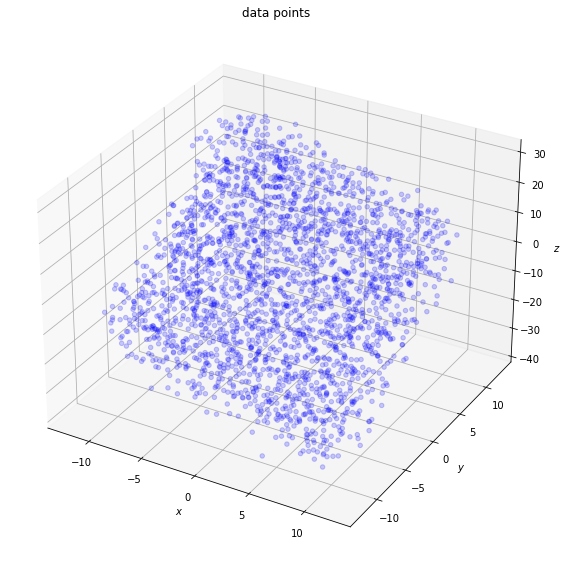

In [59]:
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot(111, projection='3d')

ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_zlabel('$z$')
ax1.scatter(x, y, z, marker='o', color='blue', alpha=0.2)

plt.title('data points')
plt.tight_layout()
plt.show()

## compute the prediction function

- $\theta = (\theta_0, \theta_1, \theta_2) \in \mathbb{R}^3$
- $x, y \in \mathbb{R}$

In [60]:
def compute_prediction(theta, x, y):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks

    # prediction = z hat
    prediction = theta[0] + theta[1] * x + theta[2] * y

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return prediction

## compute the loss function
- $\theta = (\theta_0, \theta_1, \theta_2) \in \mathbb{R}^3$
- $x, y, z \in \mathbb{R}$

In [61]:
def compute_residual(theta, x, y, z):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    prediction  = compute_prediction(theta, x, y)
    residual    = prediction - z
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return residual

- useful functions: `np.inner`

In [62]:
def compute_loss(theta, x, y, z):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    number_data = x.shape[0]
    residual    = compute_residual(theta, x, y, z)
    loss        = np.inner(residual.T, residual)/(2*number_data)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return loss

## compute the gradient for the model parameters $\theta$

- useful functions: `np.matmul`

In [63]:
def compute_gradient(theta, x, y, z):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    number_data = x.shape[0]
    residual    = compute_residual(theta, x, y, z)
    A           = np.vstack([np.ones((number_data, )), x, y])
    gradient    = np.matmul(A, residual)/number_data
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return gradient

## gradient descent for the optimization

In [64]:
number_iteration    = 1000
learning_rate       = 0.01

theta           = np.array((0, 0, 0))
theta_iteration = np.zeros((number_iteration, len(theta)))
loss_iteration  = np.zeros(number_iteration)

for i in range(number_iteration):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #    
    theta   = theta - learning_rate * compute_gradient(theta, x, y, z)
    loss    = compute_loss(theta, x, y, z)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    theta_iteration[i, :]   = theta
    loss_iteration[i]       = loss

___

___

## functions for presenting the results

___

___

In [65]:
def function_result_01():
    
    plt.figure(figsize=(8,6))
    plt.title('loss')

    plt.plot(loss_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [66]:
def function_result_02():
    
    plt.figure(figsize=(8,6))
    plt.title('model parameters')

    plt.plot(theta_iteration[:, 0], '-', color='red', label=r'$\theta_0$')
    plt.plot(theta_iteration[:, 1], '-', color='green', label=r'$\theta_1$')
    plt.plot(theta_iteration[:, 2], '-', color='blue', label=r'$\theta_2$')
    
    plt.xlabel('iteration')
    plt.ylabel('model parameter')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [67]:
def function_result_03():

    xx = np.arange(-10, 10, 0.1)
    yy = np.arange(-10, 10, 0.1)

    (grid_x, grid_y) = np.meshgrid(xx,yy)
    zz = theta[0] + theta[1] * grid_x + theta[2] * grid_y

    fig = plt.figure(figsize=(8,8))
    ax  = fig.add_subplot(111, projection='3d')
    plt.title('regression surface')

    ax  = plt.axes(projection='3d')

    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_zlabel(r'$z$')

    ax.plot_surface(grid_x, grid_y, zz, rstride=1, cstride=1, cmap='viridis', edgecolor='none', alpha=0.5)
    ax.scatter(x, y, z, marker='o', color='blue', alpha=0.5)

    plt.tight_layout()
    plt.show()

___

___

# results

___

___

**************************************************
## [RESULT 01]
**************************************************


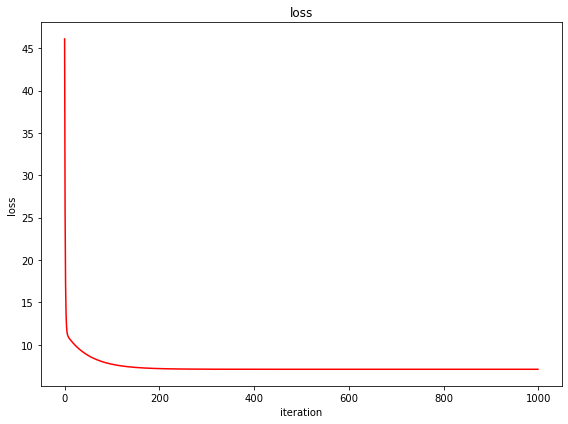

**************************************************
## [RESULT 02]
**************************************************


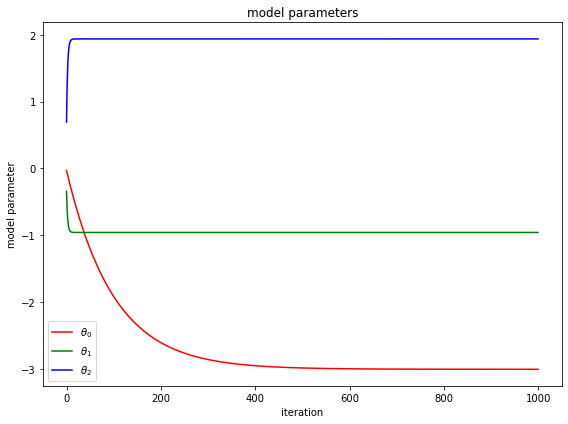

**************************************************
## [RESULT 03]
**************************************************


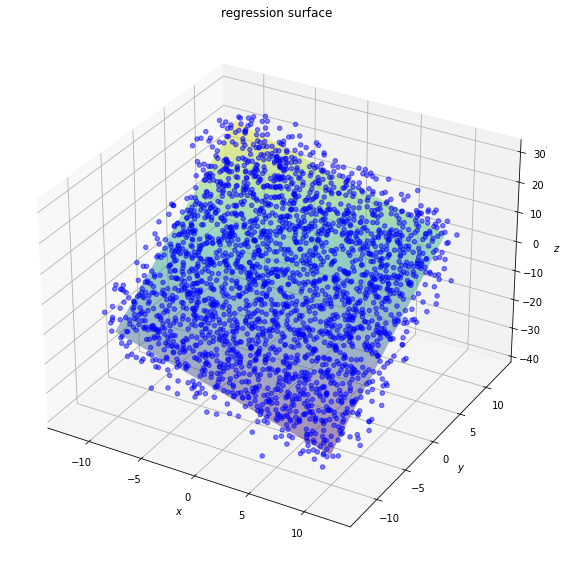

In [68]:
number_result = 3

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)